# Business Analytics Modeling Assessment 
    submited by David Samuel, Data Scientist

In [22]:
# Import Data Analysis Tool Kit
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [23]:
#Import data into pandas data frame
df = pd.read_csv('./data/assessment_data.tsv', sep='\t', header=0)

df.head()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name
0,3594065,2017-06-01,3594065_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-07T02:10:00Z,8942.000,56.000,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
1,3594068,2017-06-01,3594068_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-06T02:10:00Z,11642.000,32.000,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
2,3594070,2017-06-01,3594070_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-05T00:10:00Z,10344.000,49.000,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
3,3594118,2017-06-01,3594118_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-06T02:10:00Z,13130.000,32.000,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
4,3594116,2017-06-01,3594116_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-07T02:10:00Z,13102.000,48.000,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium


## Step 1: Describe the data
- Define the scope of analysis
- Format data
- Handle missing data


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 13 columns):
event_id                 8980 non-null int64
listing_date             8980 non-null object
event_listing_date_id    8980 non-null object
taxonomy                 8839 non-null object
event_title              8980 non-null object
event_datetime           8980 non-null object
tickets_listed           6334 non-null float64
mean_listing_price       6334 non-null float64
performer_1              8980 non-null object
performer_2              5668 non-null object
performer_3              201 non-null object
performer_4              11 non-null object
venue_name               8980 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 912.1+ KB


### There are 8,980 events and ticket data on 6,334 events.
This project will predict both, the number of tickets, and the mean listing price for those tickets listed for the remaining 2,646 events 

## Step 2: Compare the data
- Look at groups
- analyze the normality of the data
- prepare data for testing

In [25]:
df.count()

event_id                 8980
listing_date             8980
event_listing_date_id    8980
taxonomy                 8839
event_title              8980
event_datetime           8980
tickets_listed           6334
mean_listing_price       6334
performer_1              8980
performer_2              5668
performer_3               201
performer_4                11
venue_name               8980
dtype: int64

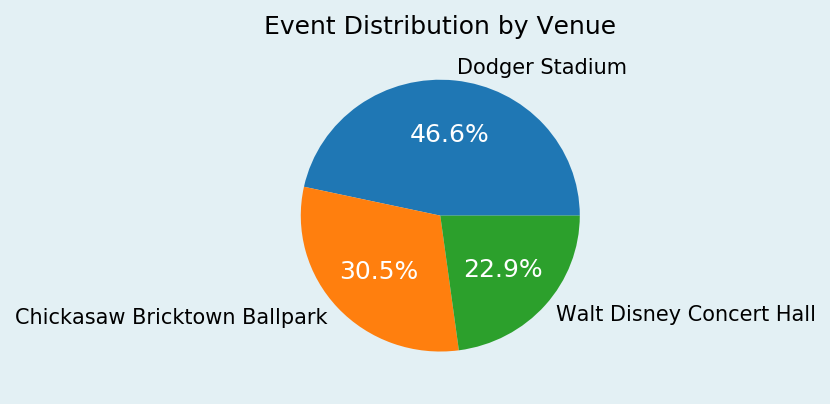

In [26]:
import matplotlib.figure as fig
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3), dpi=150, facecolor="#e3f0f4")
ax = plt.title('Event Distribution by Venue')
patches, texts, autotexts = plt.pie(df.venue_name.value_counts(), labels=df.venue_name.unique(), autopct='%1.1f%%', textprops={'color': 'white'})

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_color('black')
    
for t in autotexts:
    t.set_size('large')

plt.show()

In [27]:
df[['tickets_listed', 'mean_listing_price']][df.tickets_listed.notnull()].groupby(df['venue_name']).describe()

tickets_listed                            \
                                      count     mean      std     min   
venue_name                                                              
Chickasaw Bricktown Ballpark       1783.000   44.145   26.306   3.000   
Dodger Stadium                     2194.000 9240.490 1832.835 892.000   
Walt Disney Concert Hall           2357.000   41.328   13.240   3.000   

                                                                    \
                                  25%      50%       75%       max   
venue_name                                                           
Chickasaw Bricktown Ballpark   23.000   30.000    67.000   117.000   
Dodger Stadium               8496.500 9559.500 10412.500 13594.000   
Walt Disney Concert Hall       33.000   39.000    50.000    95.000   

                             mean_listing_price                         \
                                          count    mean     std    min   
venue_name                                                               
Chickasaw Bricktown Ballpark           1783.000  35.338   3.404 25.000   
Dodger Stadium                         2194.000  51.393  16.802 10.000   
Walt Disney Concert Hall               2357.000 541.387 160.125 86.000   

                                                              
                                 25%     50%     75%     max  
venue_name                                                    
Chickasaw Bricktown Ballpark  33.000  36.000  37.260  69.000  
Dodger Stadium                41.000  48.000  64.000 139.020  
Walt Disney Concert Hall     462.560 565.320 615.330 857.430

### On average...

1. Dodgers Stadium leads the ticket listings by several orders of magnitude with 9,240.
2. Listings for Chickasaw Bricktown Ballpark and Walt Disney Concert Hall are similar, but not in price.

In [28]:
df['months'] = pd.PeriodIndex(df.event_datetime, freq='M')
dates = df.sort_values('months', ascending=True)

In [29]:
df['listings'] = pd.PeriodIndex(df.listing_date, freq='M')
listing_dates = df.sort_values('months', ascending=True)

# Look at listings by date

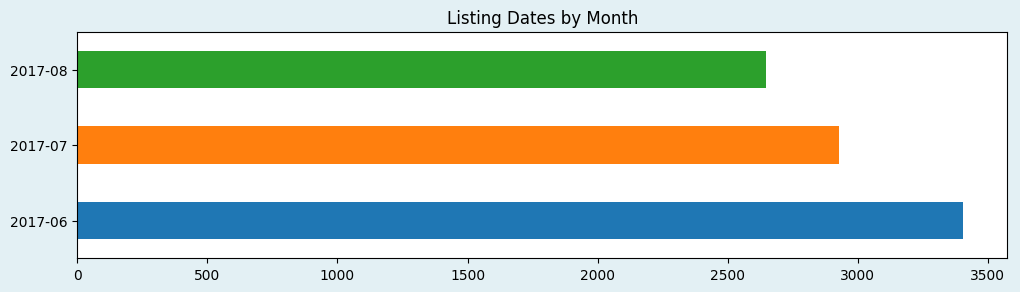

In [30]:

plt.figure(figsize=(12,3), dpi=100, facecolor="#e3f0f4")
ax = plt.title('Listing Dates by Month')
ax = listing_dates.listings.value_counts().plot.barh()

plt.xticks(rotation='0')
plt.show()

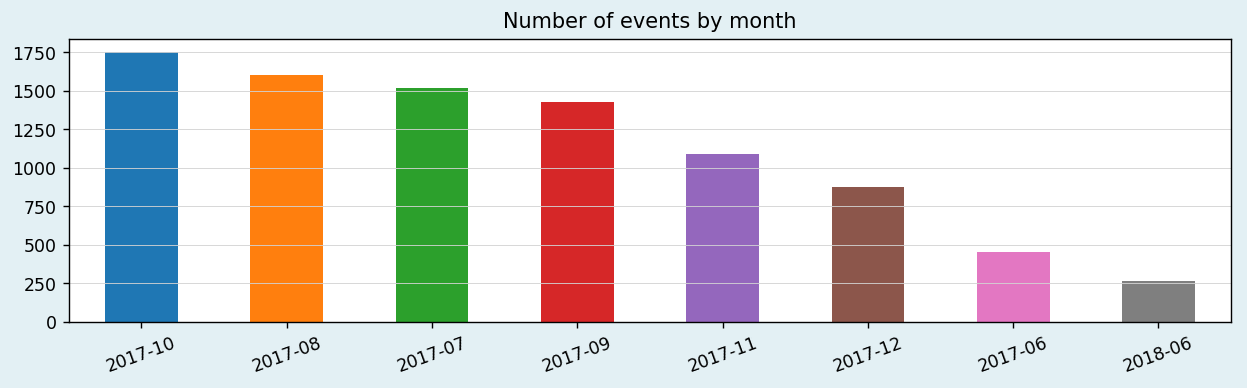

In [31]:

plt.figure(figsize=(12,3), dpi=125, facecolor="#e3f0f4")
ax = plt.title('Number of events by month')
ax = dates.months.value_counts().plot.bar()
ax.grid(color='lightgray', linestyle='-', linewidth=0.5, axis='y')
plt.xticks(rotation='20')
plt.show()

### Now look at only dates where tickets are listed to find prices

In [32]:
df = df[df.tickets_listed.notnull()]

In [33]:
# df['time'] = pd.to_datetime(df.event_datetime)

In [34]:
df[df.time < '2018-02'].head()

AttributeError: 'DataFrame' object has no attribute 'time'

In [35]:
df['days'] = pd.PeriodIndex(df.listing_date, freq='D')
days = df.sort_values('days', ascending=True)

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [37]:
# Sample data to play with.
y = df['mean_listing_price'].dropna()
x = pd.to_numeric(df.event_datetime)

plt.scatter(x, y)

ValueError: Unable to parse string "2017-09-07T02:10:00Z" at position 0

In [ ]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()